# Integration
1. Process of reversing differentiation and accumulating

# Integrating using the power rule with a real world application

## **Real-World Problem: Water Tank Engineering**

### **The Challenge:**

You're designing a water storage system. Water flows in at a rate that changes over time: **Rate(t) = 3t² gallons per minute**. How much water accumulates in the first 5 minutes?

The accumulated water is 125.00 gallons (total over 5 minutes)
Estimated numerical error: 1.39e-12 gallons


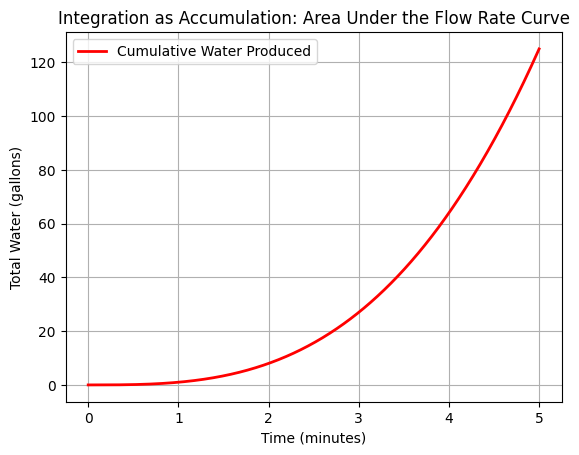

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# ---------------------------------------------------------------
# Example: Estimating total water produced over time using integration
# ---------------------------------------------------------------

# Define the instantaneous flow rate of water as a function of time.
# Here, the flow rate increases with time following the rule:
#     rate(t) = 3t²  (in gallons per minute)
# This means: the longer we run, the faster the water flows!
def water_flow(t):
    return 3 * t**2

# ---------------------------------------------------------------
# STEP 1: Compute the total accumulated water between 0 and 5 minutes
# ---------------------------------------------------------------
# 'quad' performs numerical integration (i.e., approximates the area under the curve).
# It returns two values:
#   - result: the estimated integral value (total water)
#   - error:  the numerical error estimate of the approximation
result, error = quad(water_flow, 0, 5)

print(f"The accumulated water is {result:.2f} gallons (total over 5 minutes)")
print(f"Estimated numerical error: {error:.2e} gallons")

# ---------------------------------------------------------------
# STEP 2: Visualize how water accumulation grows over time
# ---------------------------------------------------------------
# Generate 1000 time points between 0 and 5 minutes
t = np.linspace(0, 5, 1000)

# For each time value, integrate from 0 up to that point to get cumulative total.
# This simulates "filling up" over time.
cumulative = [quad(water_flow, 0, ti)[0] for ti in t]

# Plot the cumulative water curve
plt.plot(t, cumulative, 'r-', linewidth=2, label="Cumulative Water Produced")
plt.legend()
plt.xlabel("Time (minutes)")
plt.ylabel("Total Water (gallons)")
plt.title("Integration as Accumulation: Area Under the Flow Rate Curve")
plt.grid(True)
plt.show()

# ---------------------------------------------------------------
# Key insight:
# Integration = Area under the curve = Total accumulated quantity.
# Here, it tells us how much water has been produced up to any given time.
# ---------------------------------------------------------------


## **Real-World Problem: Chemical Reactor Design**

### **The Challenge:**

A chemical reaction produces molecules at rate **R(t) = 2t√(t²+1) molecules per second**. This rate function doesn't have an obvious integral. How many total molecules are produced in the first 3 seconds?

### **Why Standard Integration Fails:**

- Can't integrate √(t²+1) using basic power rule
- Need a technique to simplify the expression
- **Solution:** Change of variables (substitution)

### **Substitution Strategy:**
Let u = t² + 1  
Then du = 2t dt  
So 2t dt = du  

∫ 2t√(t²+1) dt = ∫ √u du  
= ∫ u^(1/2) du   
= (2/3)u^(3/2) + C  
= (2/3)(t²+1)^(3/2) + C


🧪 Chemical Reactor: Substitution Method Demonstration
Rate function: R(t) = 2t√(t² + 1)
Total molecules produced from t = 0 to 3 s → 20.4152
(Numerical error estimate: 1.24e-11)
Analytical (u-substitution) = 20.4152


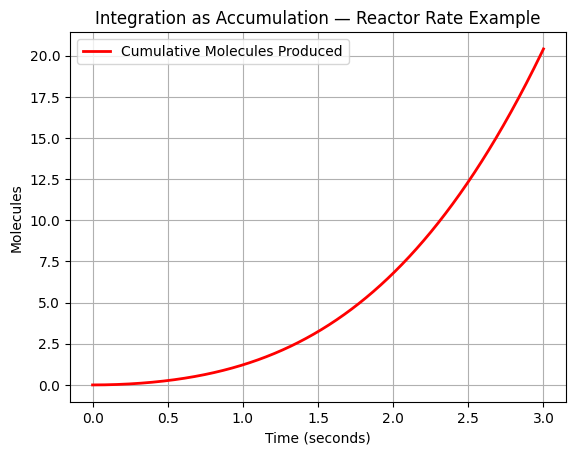

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# ---------------------------------------------------------------
# 🧪 CHEMICAL REACTOR EXAMPLE — Classic Substitution Integral
# ---------------------------------------------------------------
# The instantaneous reaction rate is given by:
#       R(t) = 2t * √(t² + 1)
#
# This describes how fast molecules are being produced per second.
# The total number of molecules produced from t = 0 → 3 seconds
# can be found by integrating this rate over time.
#
# 🧮 Substitution insight (manual method):
# Let u = t² + 1  →  du = 2t dt
# Then ∫ 2t√(t² + 1) dt = ∫ √u du = (2/3)(t² + 1)^(3/2) + C
#
# The definite integral from 0 → 3 gives the total accumulation.
def function(x):
    return 2 * x * np.sqrt(x**2 + 1)

# ---------------------------------------------------------------
# STEP 1: Numerical integration with SciPy
# ---------------------------------------------------------------
result, error = quad(function, 0, 3)

print("🧪 Chemical Reactor: Substitution Method Demonstration")
print("Rate function: R(t) = 2t√(t² + 1)")
print(f"Total molecules produced from t = 0 to 3 s → {result:.4f}")
print(f"(Numerical error estimate: {error:.2e})")

# ---------------------------------------------------------------
# STEP 2: Compare with analytical (substitution) result
# ---------------------------------------------------------------
# Using the substitution solution:
# (2/3) * [(t² + 1)^(3/2)] evaluated from 0 → 3
analytical = (2/3) * ((3**2 + 1)**(3/2) - (0**2 + 1)**(3/2))
print(f"Analytical (u-substitution) = {analytical:.4f}")

# ---------------------------------------------------------------
# STEP 3: Visualize accumulation over time
# ---------------------------------------------------------------
t = np.linspace(0, 3, 1000)
cumulative = [quad(function, 0, ti)[0] for ti in t]

plt.plot(t, cumulative, 'r-', linewidth=2, label="Cumulative Molecules Produced")
plt.xlabel("Time (seconds)")
plt.ylabel("Molecules")
plt.legend()
plt.grid(True)
plt.title("Integration as Accumulation — Reactor Rate Example")
plt.show()

# ---------------------------------------------------------------
# 🔍 Insight:
# Integration here “adds up” the instantaneous production rate R(t)
# to reveal the *total molecules formed*.
#
# Substitution simplifies the math by transforming √(t² + 1)
# into something easier to integrate (a simple power of u).
#
# So in physics terms: integration = summing up infinitesimal creation events.
# ---------------------------------------------------------------


# Another question
What if we could do the same for $4\ cos3t\ dt$

The accumulated water is -0.5607 gallons (from 1 to 2 minutes)
Analytical (by substitution) = -0.5607 gallons


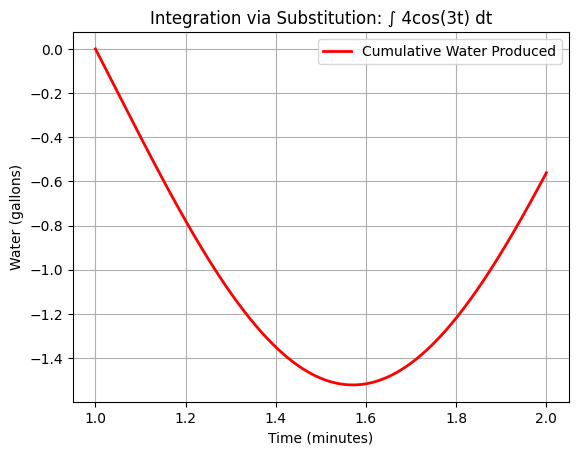

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# ---------------------------------------------------------------
# Classic Substitution Example: Integrating 4 * cos(3t)
# ---------------------------------------------------------------
# Mathematically, we’re finding ∫ 4 * cos(3t) dt from t = 1 to t = 2.
#
# You can solve this by hand using *u-substitution*:
#     Let u = 3t  →  du = 3 dt  →  dt = du/3
# Then the integral becomes:
#     ∫ 4 * cos(3t) dt = (4/3) ∫ cos(u) du = (4/3) * sin(u) + C
# Finally, substitute back u = 3t:
#     (4/3) * sin(3t) + C
#
# In code, we’ll confirm this using numerical integration (SciPy).
def water_flow(t):
    "Flow rate equation: 4 * cos(3t)"
    return 4 * np.cos(3 * t)

# ---------------------------------------------------------------
# STEP 1: Compute the definite integral numerically (from 1 → 2)
# ---------------------------------------------------------------
result, error = quad(water_flow, 1, 2)
print(f"The accumulated water is {result:.4f} gallons (from 1 to 2 minutes)")

# ---------------------------------------------------------------
# STEP 2: Compare with the *analytical* substitution result
# ---------------------------------------------------------------
# Analytical solution: (4/3) * [sin(3t)] from 1 → 2
analytical = (4/3) * (np.sin(3*2) - np.sin(3*1))
print(f"Analytical (by substitution) = {analytical:.4f} gallons")

# ---------------------------------------------------------------
# STEP 3: Visualize accumulation over time
# ---------------------------------------------------------------
t = np.linspace(1, 2, 1000)
cumulative = [quad(water_flow, 1, ti)[0] for ti in t]

plt.plot(t, cumulative, 'r-', linewidth=2, label="Cumulative Water Produced")
plt.legend()
plt.xlabel("Time (minutes)")
plt.ylabel("Water (gallons)")
plt.title("Integration via Substitution: ∫ 4cos(3t) dt")
plt.grid(True)
plt.show()

# ---------------------------------------------------------------
# Insight:
# Substitution is like "undoing" a chain rule.
# The outer function (cos) has an inner function (3t).
# Integration reverses that chain — dividing by the inner derivative (3).
#
# SciPy’s quad just does this numerically instead of symbolically.
# ---------------------------------------------------------------


## **Real-World Problem: Radar Signal Analysis**

### **The Challenge:**

A radar system receives a signal with strength **$S(t) = t·e^{(-t)}$** watts at time t seconds. What's the total energy received over infinite time?

**Why This Matters:** Radar range calculations, communication system design, satellite tracking

⚡ Energy Dissipation — Integration by Parts Demonstration
Rate function: P(t) = t * e^(-t)
Analytical result (by IBP): 1.0000 watts·seconds
Numerical result (SciPy):   1.0000 watts·seconds
Error estimate: 5.90e-10


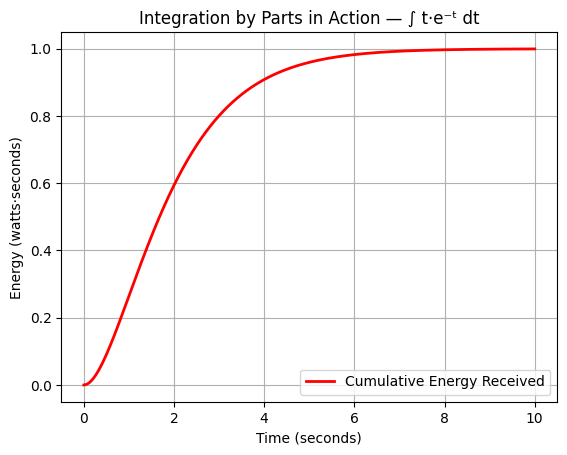

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# ---------------------------------------------------------------
# ⚡ ENERGY RELEASE MODEL — Integration by Parts Example
# ---------------------------------------------------------------
# Power function: P(t) = t * e^(-t)
#
# Interpretation:
#   - t: represents a process that *starts slowly and builds up* (like reaction intensity)
#   - e^(-t): represents an *exponential decay* (like energy loss over time)
#
# The product t·e^(-t) is common in physics and engineering — it rises, peaks, then fades.
#
# We want the *total energy* received: ∫₀^∞ t·e^(-t) dt
def function(t):
    return t * np.exp(-t)

# ---------------------------------------------------------------
# 🔹 STEP 1: Solve analytically using Integration by Parts
# ---------------------------------------------------------------
# Let’s recall the formula: ∫u dv = u·v - ∫v du
#
# Choose:
#   u = t          → du = dt
#   dv = e^(-t)dt  → v = -e^(-t)
#
# Then:
#   ∫t·e^(-t)dt = -t·e^(-t) + ∫e^(-t)dt
#                = -t·e^(-t) - e^(-t) + C
#                = -(t + 1)e^(-t) + C
#
# Evaluate from 0 → ∞:
#   As t → ∞, e^(-t) → 0, so the first term vanishes.
#   At t = 0:  -(0 + 1)e^(0) = -1
#   So the total = 0 - (-1) = 1
#
# Therefore, ∫₀^∞ t·e^(-t)dt = 1.
# ---------------------------------------------------------------

# Numerical verification using SciPy:
result, error = quad(function, 0, np.inf)
print("⚡ Energy Dissipation — Integration by Parts Demonstration")
print("Rate function: P(t) = t * e^(-t)")
print(f"Analytical result (by IBP): 1.0000 watts·seconds")
print(f"Numerical result (SciPy):   {result:.4f} watts·seconds")
print(f"Error estimate: {error:.2e}")

# ---------------------------------------------------------------
# 🔹 STEP 2: Visualize the cumulative energy over time
# ---------------------------------------------------------------
time = np.linspace(0, 10, 1000)
cumulative_energy = [quad(function, 0, ti)[0] for ti in time]

plt.plot(time, cumulative_energy, 'r-', linewidth=2, label="Cumulative Energy Received")
plt.xlabel("Time (seconds)")
plt.ylabel("Energy (watts·seconds)")
plt.legend()
plt.grid(True)
plt.title("Integration by Parts in Action — ∫ t·e⁻ᵗ dt")
plt.show()

# ---------------------------------------------------------------
# 💡 INSIGHT:
# - The "product" t·e^(-t) is the hallmark of Integration by Parts:
#   one part grows (t), the other decays (e^(-t)).
# - IBP elegantly reduces this product into simpler exponential terms.
# - Physically, it models processes that *build up then fade away* —
#   such as heating curves, radioactive decay rates, or charge discharge.
# ---------------------------------------------------------------


# Definite Integrals - Area, Volumes and Physical Quantities

Design an optimal solar panel shape.   
Panel efficiency varies across its width as η(x) = sin(x) + 0.5cos(x) for 0 ≤ x ≤ π.     What's the total energy output?

☀️ Solar Panel Energy Optimization Example
Total energy output (0 → π): 2.0000 watts·radians
Numerical error estimate: 2.48e-14
Critical point (max energy rate) ≈ 2.6779 radians


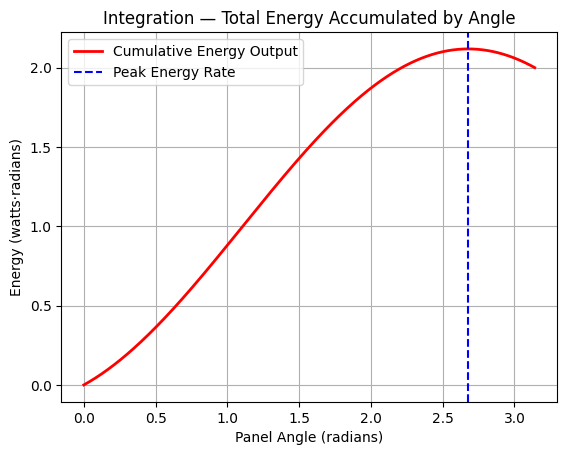

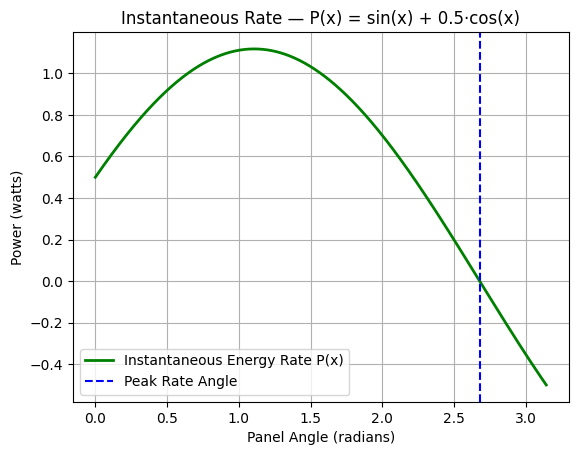

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import fsolve

# ---------------------------------------------------------------
# ☀️ SOLAR PANEL ENERGY MODEL — Integration + Optimization
# ---------------------------------------------------------------
# Instantaneous output rate:
#     P(x) = sin(x) + 0.5·cos(x)
# Integration over [0, π] gives total energy output,
# while fsolve helps find where the rate (P) peaks.
def integral(x):
    return np.sin(x) + 0.5 * np.cos(x)

# STEP 1: Total energy output over full range
result, error = quad(integral, 0, np.pi)
print("☀️ Solar Panel Energy Optimization Example")
print(f"Total energy output (0 → π): {result:.4f} watts·radians")
print(f"Numerical error estimate: {error:.2e}")

# STEP 2: Find critical points (where P(x) = 0)
critical_points = fsolve(integral, [0.5, 1, 1.5, 2, 2.5])
critical_points = critical_points[(critical_points >= 0) & (critical_points <= np.pi)]
max_point = max(critical_points)
print(f"Critical point (max energy rate) ≈ {max_point:.4f} radians")

# STEP 3: Plot cumulative energy curve
x = np.linspace(0, np.pi, 1000)
y = [quad(integral, 0, i)[0] for i in x]

plt.plot(x, y, 'r-', linewidth=2, label="Cumulative Energy Output")
plt.axvline(max_point, color='b', linestyle='--', label="Peak Energy Rate")
plt.xlabel("Panel Angle (radians)")
plt.ylabel("Energy (watts·radians)")
plt.legend()
plt.grid(True)
plt.title("Integration — Total Energy Accumulated by Angle")
plt.show()

# ---------------------------------------------------------------
# SECOND PLOT: Instantaneous power curve
# ---------------------------------------------------------------
# This graph shows how the *rate* of energy output behaves at each angle.
# It helps learners see why cumulative energy eventually levels off.
rate = integral(x)

plt.plot(x, rate, 'g-', linewidth=2, label="Instantaneous Energy Rate P(x)")
plt.axvline(max_point, color='b', linestyle='--', label="Peak Rate Angle")
plt.xlabel("Panel Angle (radians)")
plt.ylabel("Power (watts)")
plt.legend()
plt.grid(True)
plt.title("Instantaneous Rate — P(x) = sin(x) + 0.5·cos(x)")
plt.show()

# ---------------------------------------------------------------
# 🧠 INSIGHT:
# - The first graph (red) shows total accumulated energy (integral of P(x)).
# - The second graph (green) shows the instantaneous energy rate.
# - The vertical dashed line marks where power is highest —
#   after this point, the panel produces less additional energy per unit angle.
# ---------------------------------------------------------------


### 💡 Visual Insight
Notice how the integral (red curve) grows or declines based on the sign of the original function.
When the function is positive, the accumulated area increases;
when negative, it decreases — illustrating how integration and differentiation
are inverse operations.